In [4]:
import csv
import numpy as np
import matplotlib.pylab as pl
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit
from scipy import signal

%matplotlib inline

pl.rcParams['figure.figsize']  = 12, 7.5
pl.rcParams['lines.linewidth'] = 1.5
pl.rcParams['font.family']     = 'serif'
pl.rcParams['font.weight']     = 'bold'
pl.rcParams['font.size']       = 20
pl.rcParams['font.sans-serif'] = 'serif'
pl.rcParams['text.usetex']     = True
pl.rcParams['axes.linewidth']  = 1.5
pl.rcParams['axes.titlesize']  = 'medium'
pl.rcParams['axes.labelsize']  = 'medium'

pl.rcParams['xtick.major.size'] = 4
pl.rcParams['xtick.minor.size'] = 2
pl.rcParams['xtick.major.pad']  = 8
pl.rcParams['xtick.minor.pad']  = 8
pl.rcParams['xtick.color']      = 'k'
pl.rcParams['xtick.labelsize']  = 'small'
pl.rcParams['xtick.direction']  = 'in'

pl.rcParams['ytick.major.size'] = 8
pl.rcParams['ytick.minor.size'] = 4
pl.rcParams['ytick.major.pad']  = 8
pl.rcParams['ytick.minor.pad']  = 8
pl.rcParams['ytick.color']      = 'k'
pl.rcParams['ytick.labelsize']  = 'medium'
pl.rcParams['ytick.direction']  = 'in'

In [5]:
def gaussian(x, a, b, c):
    exponential_term = np.power((x - a)/b, 2)
    return c*np.exp(-exponential_term)

# Measured Current Signal for CM_Range_100uA

### CM_Range_100uA - 100000 Datapoints

#### Zener_1

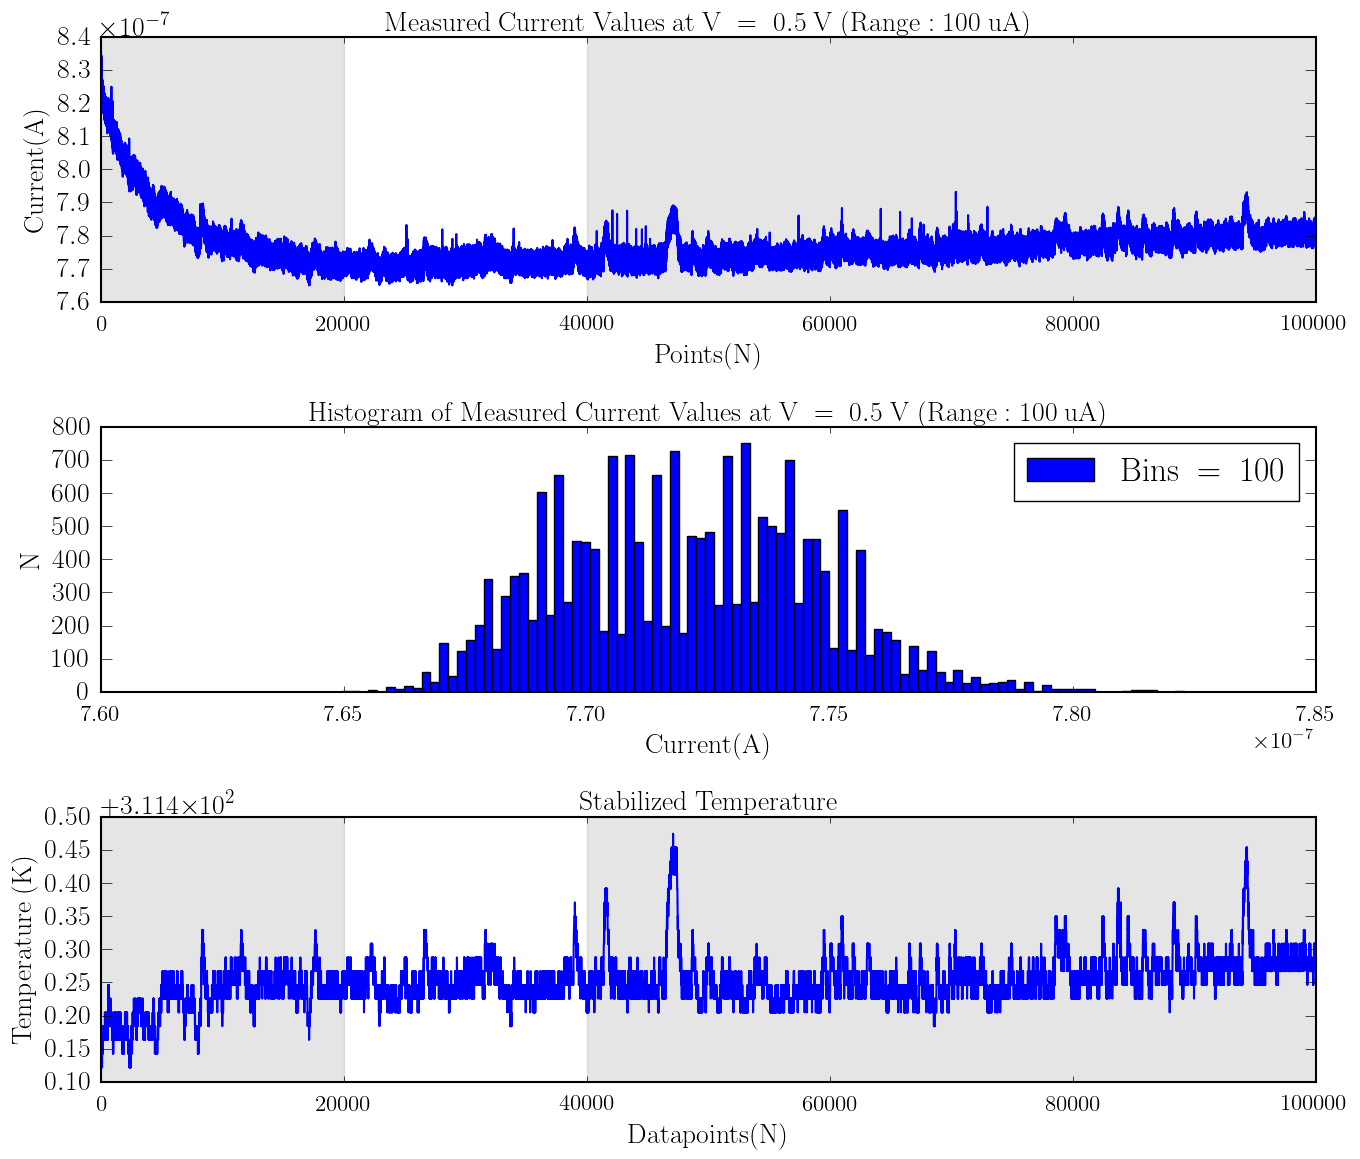

In [6]:
with open("../../ExecutionLogs/NoiseMeasurements/I-Data-10000.txt" , "r") as f:
    current        = []
    temperature    = []
    for line in f:
        current_time_tuple = line.strip('\n').split(',')
        current.append(float(current_time_tuple[0]))
        temperature.append(float(current_time_tuple[1]))

temperature = np.array(temperature)
x = np.arange(0, 100000, 1)
y = np.array(current)

pl.figure(figsize=(14, 12))
pl.subplot(311)
pl.title("$\mathrm{Measured\ Current\ Values\ at\ V\ =\ 0.5\;V\;(Range:100\;uA)}$")
pl.xlabel("$\mathrm{Points (N)}$")
pl.ylabel("$\mathrm{Current(A)}$")
pl.plot(x, y)
pl.axvspan(0, 20000, color="black",alpha=0.1)
pl.axvspan(40000, 100000, color="black", alpha=0.1)


pl.subplot(312)
Bins = 100
counts, bins, bars = pl.hist(y[20000:40000], bins=Bins, label = "$\mathrm{Bins\ =\ %d}$" %Bins)
pl.title("$\mathrm{Histogram\ of\ Measured\ Current\ Values\ at\ V\ =\ 0.5\;V\;(Range:100\;uA)}$")
pl.xlabel("$\mathrm{Current(A)}$")
pl.ylabel("$\mathrm{N}$")
pl.legend(loc = 'best')

pl.subplot(313)
pl.plot(x, temperature)
pl.title("$\mathrm{Stabilized\ Temperature}$")
pl.xlabel("$\mathrm{Datapoints(N)}$")
pl.ylabel("$\mathrm{Temperature\ (K)}$")
pl.axvspan(0, 20000, color="black",alpha=0.1)
pl.axvspan(40000, 100000, color="black", alpha=0.1)


#pl.subplots_adjust(hspace=0.6)
pl.tight_layout()

### CM_Range_100uA - 50000 Datapoints

#### Zener_1

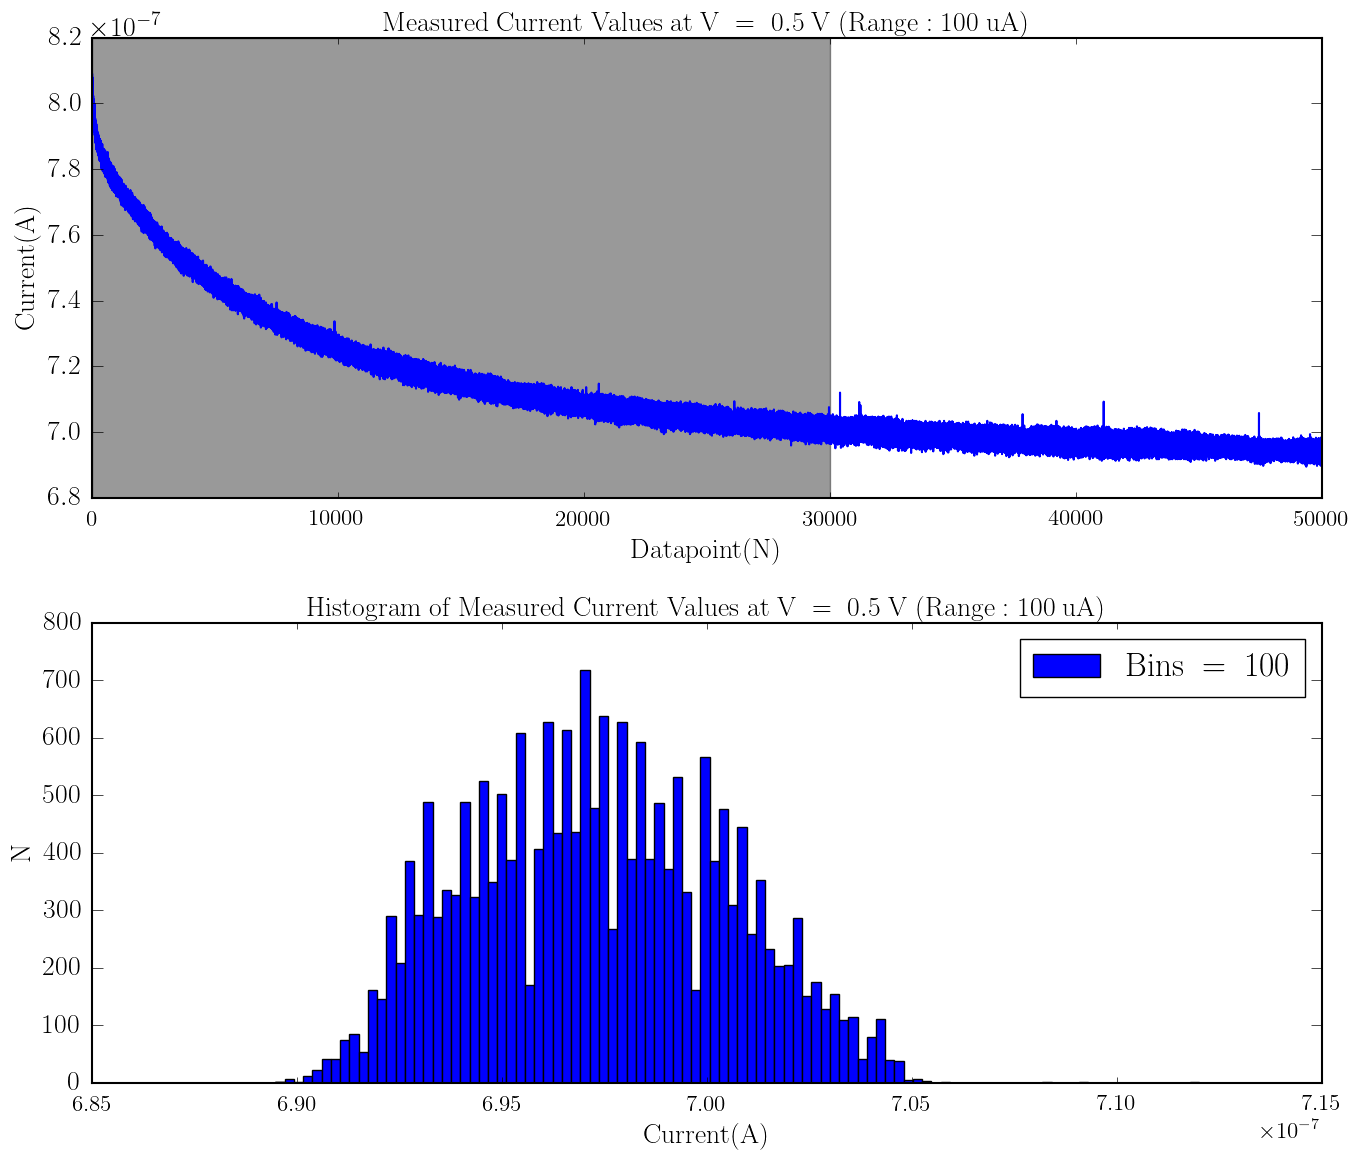

In [7]:
with open("../../ExecutionLogs/NoiseMeasurements/I-Data_100uA_50000.txt" , "r") as f:
    current        = []
    temperature    = []
    for line in f:
        current_time_tuple = line.strip('\n').split(',')
        current.append(float(current_time_tuple[0]))
        temperature.append(float(current_time_tuple[1]))

temperature = np.array(temperature)
x = np.arange(0, 50000, 1) 
y = np.array(current)

discarded = 30000

pl.figure(figsize=(14, 12))
pl.subplot(211)
pl.title("$\mathrm{Measured\ Current\ Values\ at\ V\ =\ 0.5\;V\;(Range:100\;uA)}$")
pl.xlabel("$\mathrm{Datapoint (N)}$")
pl.ylabel("$\mathrm{Current(A)}$")
pl.axvspan(0, discarded, color="black", alpha=0.4)
pl.plot(x, y)

pl.subplot(212)
Bins               = 100
counts, bins, bars = pl.hist(y[discarded:], bins=Bins, label = "$\mathrm{Bins\ =\ %d}$" %Bins)
pl.title("$\mathrm{Histogram\ of\ Measured\ Current\ Values\ at\ V\ =\ 0.5\;V\;(Range:100\;uA)}$")
pl.xlabel("$\mathrm{Current(A)}$")
pl.ylabel("$\mathrm{N}$")
pl.legend(loc = 'best')

#pl.subplots_adjust(hspace=0.6)
pl.tight_layout()

### CM_Range_100_uA - 30000 Datapoints

#### Zener_1

/projects/sage/sage-7.6/local/lib/python2.7/site-packages/ipykernel/__main__.py:50: RuntimeWarning: divide by zero encountered in divide


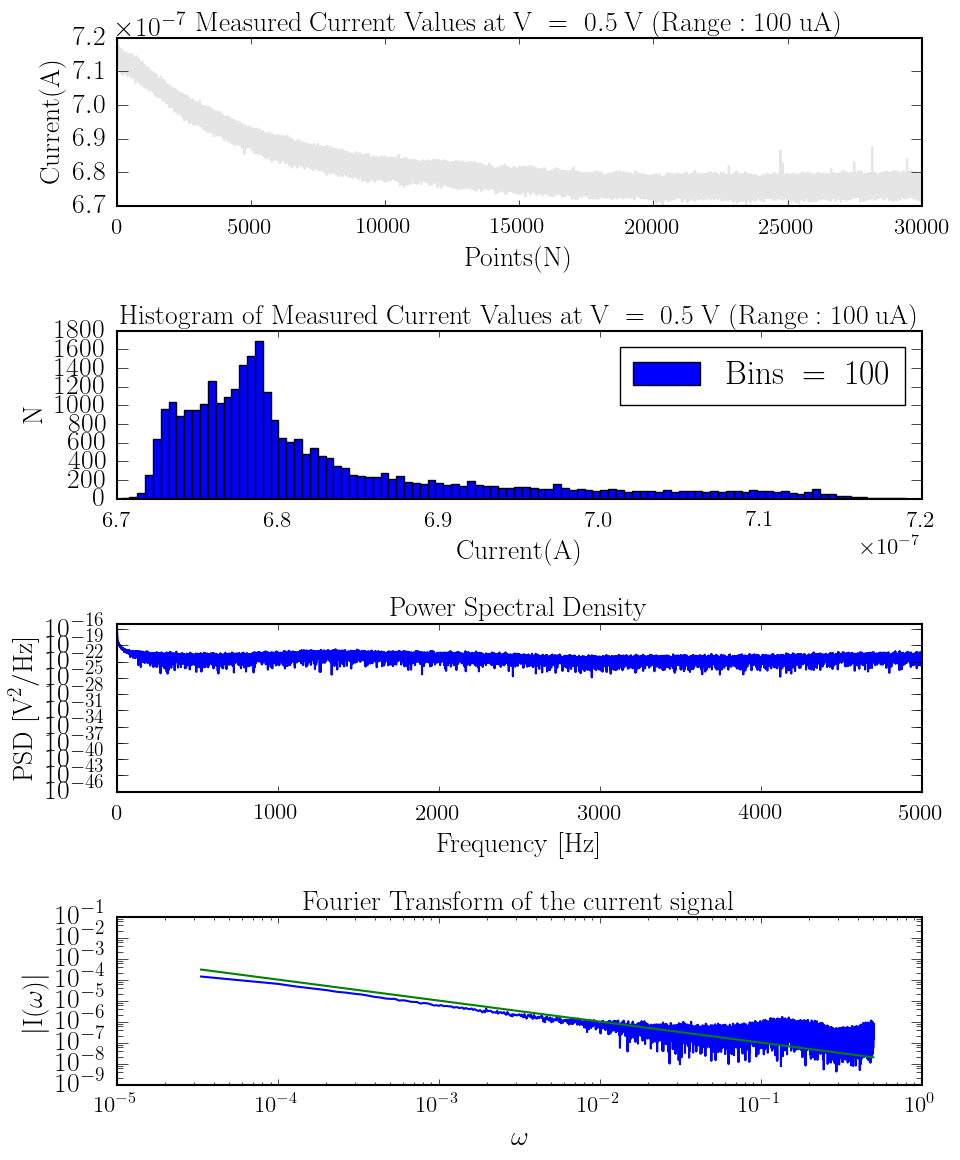

In [8]:
with open("../../ExecutionLogs/NoiseMeasurements/I-Data-90000.txt" , "r") as f:
    current        = []
    temperature    = []
    for line in f:
        current_time_tuple = line.strip('\n').split(',')
        current.append(float(current_time_tuple[0]))
        temperature.append(float(current_time_tuple[1]))

N_samples = 30000
current_range_1 = current[:N_samples]
current_range_2 = current[N_samples:(2*N_samples)]
current_range_3 = current[(2*N_samples):]
data_points = np.arange(0, N_samples, 1)

x = data_points
y = current_range_1

pl.figure(figsize=(10, 12))
pl.subplot(411)
pl.title("$\mathrm{Measured\ Current\ Values\ at\ V\ =\ 0.5\;V\;(Range:100\;uA)}$")
pl.xlabel("$\mathrm{Points (N)}$")
pl.ylabel("$\mathrm{Current(A)}$")
pl.plot(x, y, color="black", alpha=0.1)

pl.subplot(412)
Bins               = 100
counts, bins, bars = pl.hist(y, bins=Bins, label = "$\mathrm{Bins\ =\ %d}$" %Bins)
pl.title("$\mathrm{Histogram\ of\ Measured\ Current\ Values\ at\ V\ =\ 0.5\;V\;(Range:100\;uA)}$")
pl.xlabel("$\mathrm{Current(A)}$")
pl.ylabel("$\mathrm{N}$")
pl.legend(loc = 'best')

pl.subplot(413)
fs = 10e3
f, Pxx_den = signal.periodogram(y, fs)
pl.semilogy(f, Pxx_den)
pl.title ('$\mathrm{Power\ Spectral\ Density}$')
pl.xlabel('$\mathrm{Frequency\ [Hz]}$')
pl.ylabel('$\mathrm{PSD\ [V^2/Hz]}$')

freq       = np.fft.fftfreq(N_samples)
fft_array  = np.fft.fft(y)

pl.subplot(414)
pl.loglog  (freq[:N_samples/2], np.abs(fft_array)[:N_samples/2])
pl.title ("$\mathrm{Fourier\;Transform\;of\;the\;current\;signal}$")
pl.xlabel('$\mathrm{\omega}$')
pl.ylabel('$|\mathrm{I(\omega)}|$')

pl.loglog(freq[:N_samples/2], 1e-8/freq[:N_samples/2])
pl.ylim(ymin=1e-9)

#pl.subplots_adjust(hspace=0.6)
pl.tight_layout()

# Measured Current Signal for CM_Range_1mA

### CM_Range_1mA - 30000 Datapoints

#### Zener_1

/projects/sage/sage-7.6/local/lib/python2.7/site-packages/ipykernel/__main__.py:38: RuntimeWarning: divide by zero encountered in divide


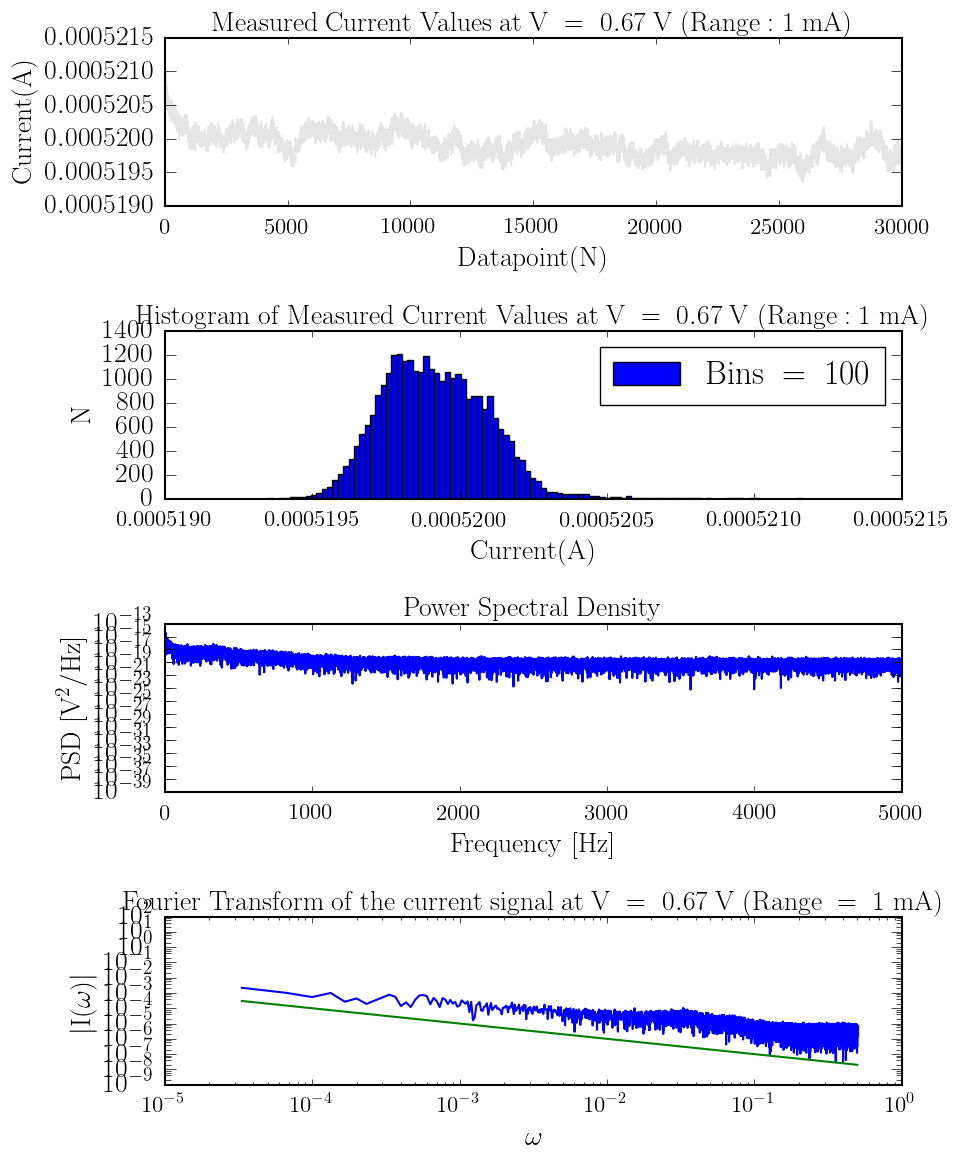

In [9]:
x = data_points
y = current_range_2
N_samples = 30000

pl.figure(figsize=(10, 12))

pl.subplot(411)
pl.title("$\mathrm{Measured\ Current\ Values\ at\ V\ =\ 0.67\;V\;(Range:1\;mA)}$")
pl.xlabel("$\mathrm{Datapoint (N)}$")
pl.ylabel("$\mathrm{Current(A)}$")
pl.plot(x, y, color="black", alpha=0.1)

pl.subplot(412)
Bins               = 100
counts, bins, bars = pl.hist(y, bins=Bins, label = "$\mathrm{Bins\ =\ %d}$" %Bins)
pl.title("$\mathrm{Histogram\ of\ Measured\ Current\ Values\ at\ V\ =\ 0.67\;V\;(Range:1\;mA)}$")
pl.xlabel("$\mathrm{Current(A)}$")
pl.ylabel("$\mathrm{N}$")
pl.legend(loc = 'best')

pl.subplot(413)
fs = 10e3
f, Pxx_den = signal.periodogram(y, fs)
pl.semilogy(f, Pxx_den)
pl.title ('$\mathrm{Power\ Spectral\ Density}$')
pl.xlabel('$\mathrm{Frequency\ [Hz]}$')
pl.ylabel('$\mathrm{PSD\ [V^2/Hz]}$')

freq       = np.fft.fftfreq(N_samples)
fft_array  = np.fft.fft(y)

pl.subplot(414)
pl.loglog  (freq[:N_samples/2], np.abs(fft_array)[:N_samples/2])
pl.title ("$\mathrm{Fourier\;Transform\;of\;the\;current\;signal\;at\;V\;=\;0.67\;V\;(Range\;=\;1\;mA)}$")
pl.xlabel('$\mathrm{\omega}$')
pl.ylabel('$|\mathrm{I(\omega)}|$')

pl.loglog(freq[:N_samples/2], 1e-8/freq[:N_samples/2])
pl.ylim(ymin=1e-9)


#pl.subplots_adjust(hspace=0.6)
pl.tight_layout()

### Fitting a Gaussian through the histogram (CM_Range_1mA)

[  5.19891161e-04   2.61587118e-07   1.18991420e+03] [[  1.23143557e-17  -1.41962690e-20   2.97395703e-11]
 [ -1.41962690e-20   2.46805408e-17  -5.61188809e-08]
 [  2.97395703e-11  -5.61188809e-08   3.82339429e+02]]


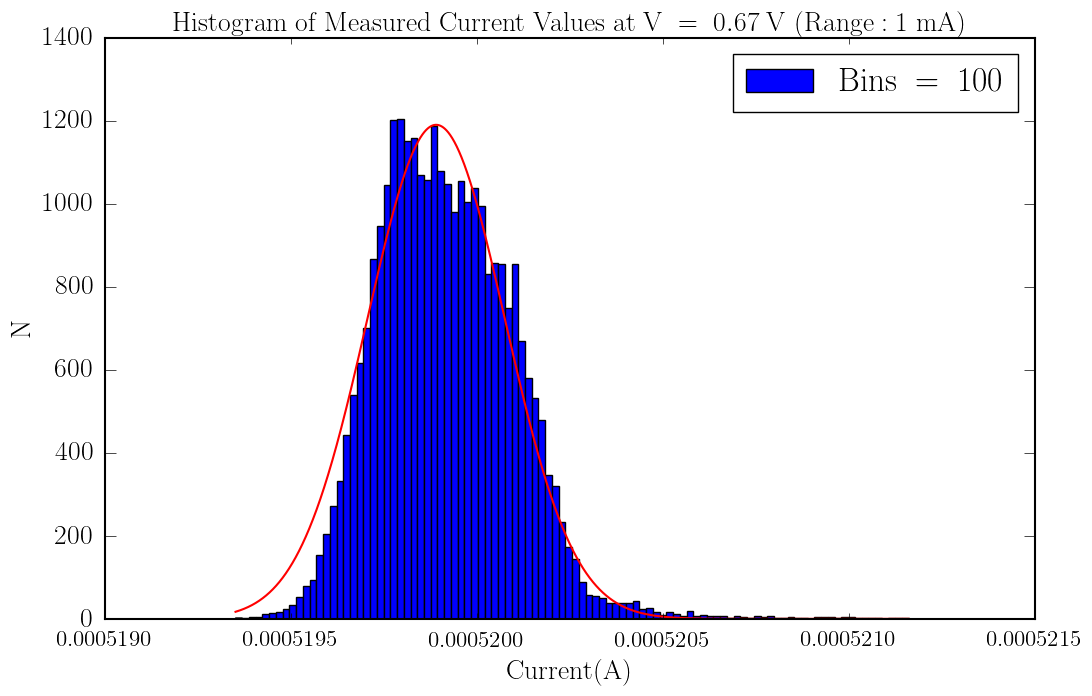

In [10]:
mean        = np.mean(current_range_2)
std         = np.std(current_range_2)
param       = [mean, std, 1200]
popt, pcov  = curve_fit(gaussian, bins[:len(bins)-1], counts, p0=param)

x_range_2   = np.linspace(min(current_range_2), max(current_range_2), 10000)
y_2         = gaussian(x_range_2, popt[0], popt[1], popt[2])

pl.plot(x_range_2, y_2, color="red")
Bins               = 100
counts, bins, bars = pl.hist(y, bins=Bins, label = "$\mathrm{Bins\ =\ %d}$" %Bins, color="blue")
pl.title("$\mathrm{Histogram\ of\ Measured\ Current\ Values\ at\ V\ =\ 0.67\;V\;(Range:1\;mA)}$")
pl.xlabel("$\mathrm{Current(A)}$")
pl.ylabel("$\mathrm{N}$")
pl.legend(loc = 'best')
print popt, pcov

# Current signal in CM_Range_10mA

### CM_Range_10mA - 30000 Datapoints

Zener_1

/projects/sage/sage-7.6/local/lib/python2.7/site-packages/ipykernel/__main__.py:43: RuntimeWarning: divide by zero encountered in divide


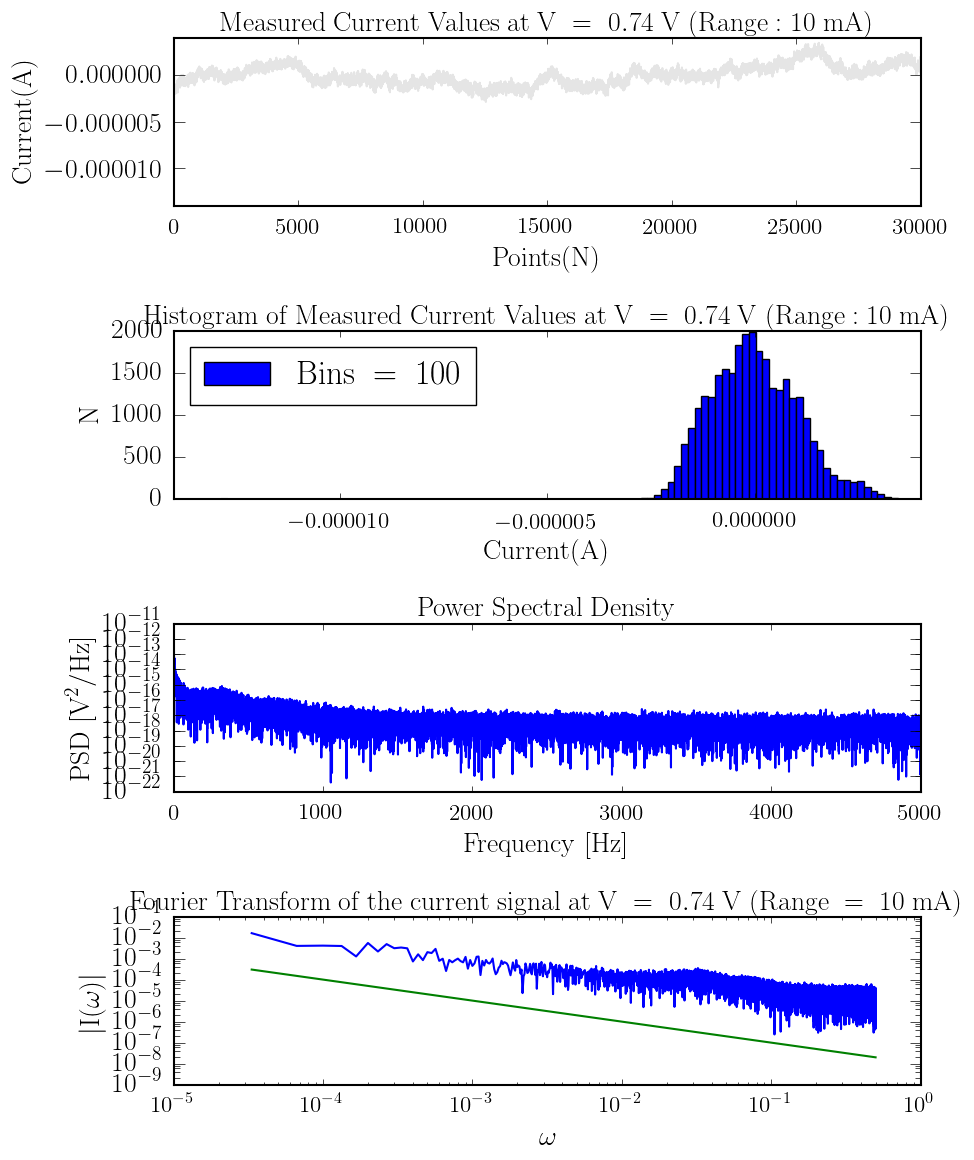

In [11]:
current_range_3 = np.array(current_range_3)
current_range_3 = current_range_3 - np.mean(current_range_3)
N_samples  = 30000

x = np.arange(0, N_samples)
y = current_range_3

pl.figure(figsize=(10,12))

pl.subplot(411)
pl.title("$\mathrm{Measured\ Current\ Values\ at\ V\ =\ 0.74\;V\;(Range:10\;mA)}$")
pl.xlabel("$\mathrm{Points (N)}$")
pl.ylabel("$\mathrm{Current(A)}$")
pl.plot(x, y, color="black", alpha=0.1)


pl.subplot(412)
Bins = 100
counts, bins, bars = pl.hist(y, bins=Bins, label = "$\mathrm{Bins\ =\ %d}$" %Bins)
pl.title("$\mathrm{Histogram\ of\ Measured\ Current\ Values\ at\ V\ =\ 0.74\;V\;(Range:10\;mA)}$")
pl.xlabel("$\mathrm{Current(A)}$")
pl.ylabel("$\mathrm{N}$")
pl.legend(loc = 'best')

pl.subplot(413)
fs = 10e3
f, Pxx_den = signal.periodogram(y, fs)
pl.semilogy(f, Pxx_den)
pl.title ('$\mathrm{Power\ Spectral\ Density}$')
pl.xlabel('$\mathrm{Frequency\ [Hz]}$')
pl.ylabel('$\mathrm{PSD\ [V^2/Hz]}$')

freq       = np.fft.fftfreq(N_samples)
fft_array  = np.fft.fft(y)

pl.subplot(414)

pl.loglog  (freq[:N_samples/2], np.abs(fft_array)[:N_samples/2])
pl.title ("$\mathrm{Fourier\;Transform\;of\;the\;current\;signal\;at\;V\;=\;0.74\;V\;(Range\;=\;10\;mA)}$")
pl.xlabel('$\mathrm{\omega}$')
pl.ylabel('$|\mathrm{I(\omega)}|$')

pl.loglog(freq[:N_samples/2], 1e-8/freq[:N_samples/2])
pl.ylim(ymin=1e-9)

#pl.subplots_adjust(hspace=0.6)
pl.tight_layout()

### FItting a Gaussian through the histogram (CM_Range_10mA)

/projects/sage/sage-7.6/local/lib/python2.7/site-packages/scipy/optimize/minpack.py:690: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[ -2.13197515e-19   1.55608309e-06   1.80068621e+03] [[ inf  inf  inf]
 [ inf  inf  inf]
 [ inf  inf  inf]]


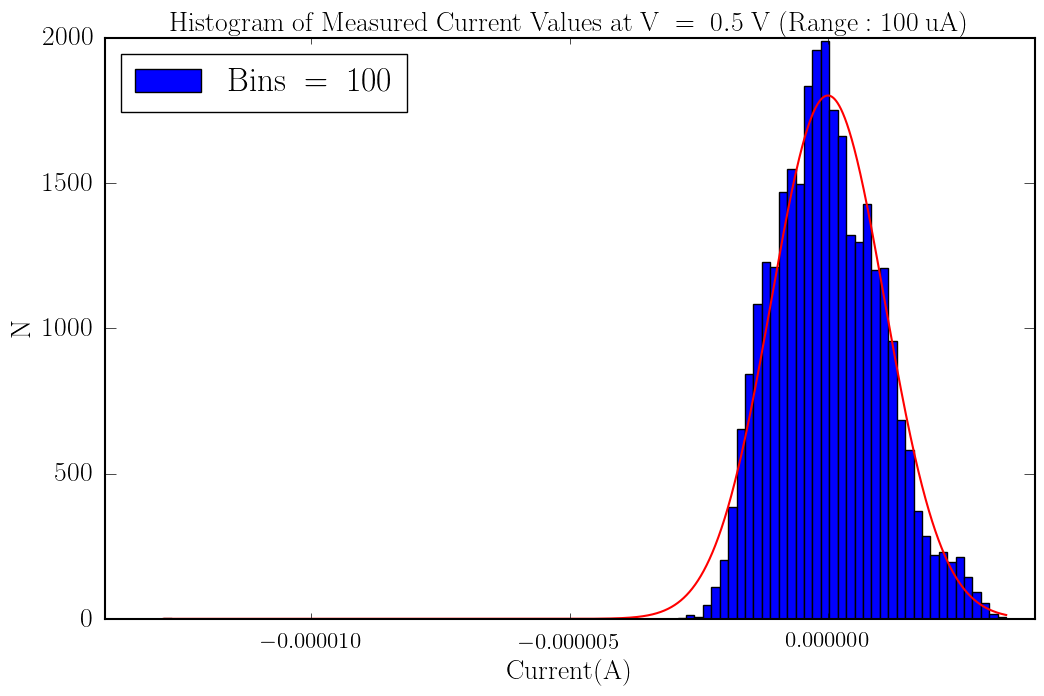

In [12]:
mean        = np.mean(current_range_3)
std         = np.std(current_range_3)
param       = [mean, std, 2000]
popt, pcov  = curve_fit(gaussian, bins[:len(bins)-1], counts, p0=param)

x_range_3   = np.linspace(min(current_range_3), max(current_range_3), 10000)
y_3         = gaussian(x_range_3, popt[0], popt[1], popt[2])

pl.plot(x_range_3, y_3, color="red")
Bins               = 100
counts, bins, bars = pl.hist(y, bins=Bins, label = "$\mathrm{Bins\ =\ %d}$" %Bins, color="blue")
pl.title("$\mathrm{Histogram\ of\ Measured\ Current\ Values\ at\ V\ =\ 0.5\;V\;(Range:100\;uA)}$")
pl.xlabel("$\mathrm{Current(A)}$")
pl.ylabel("$\mathrm{N}$")
pl.legend(loc = 'best')
print popt, pcov